# Ejercicio 4

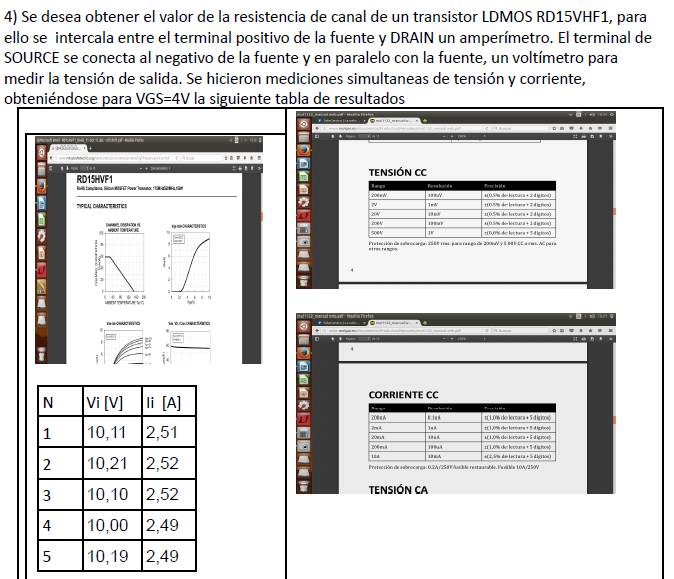

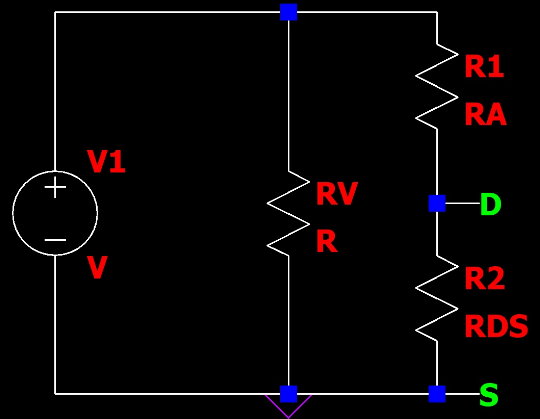

Las corrientes medidas son del orden de los ampéres, por lo que la escala de corriente utilizada es de 10A. La escala mínima de tensión es de 200mV, por lo que la resistencia del amperímetro estimada es de $\frac{200mV}{10A} = 20m\Omega$

Para saber si es necesario corregir el error de método, primero calculamos la incertidumbre de la resistencia, la expandimos a un 99% de confianza y la comparamos con el error de método multiplicado por R real (para que pasarlo a error absoluto y no porcentual).

In [2]:
import numpy as np

Vi = np.array([10.11, 10.21, 10.10, 10, 10.19])
Ii = np.array([2.51, 2.52, 2.52, 2.49, 2.49])

## Amperímetro

In [4]:
#INCERTIDUMBRE TIPO A
Ii_mean = Ii.mean()              #calculo valor medio
Ii_std = Ii.std(ddof = 1)        #calculo desvio estandar
n = len(Ii)                      #calculo cantidad de muestras

Ii_ui = Ii_std/np.sqrt(n)        #calculo incertidumbre tipo A


#NCERTIDUMBRE TIPO B
#Rango 10A: resolución: 10mA, precisión: +/-2.5% de lectura + 5 dígitos
error_amp = Ii_mean * 2.5/100 + 5*10e-3

#Asumiendo distribución uniforme:
Ii_uj = error_amp / np.sqrt(3)

#NCERTIDUMBRE COMBINADA
Ii_uc = np.sqrt(Ii_ui**2 + Ii_uj**2)

#GRADOS EFECTIVOS DE LIBERTAD DEL AMPERIMETRO
Veff_I = (n-1) * (Ii_uc / Ii_ui)**4

print("Incertidumbre tipo A de amperímetro:     Ii_ui = %0.8f" %Ii_ui)
print("Incertidumbre tipo B de amperímetro:     Ii_uj = %0.8f" %Ii_uj)
print("Incertidumbre combinada de amperímetro:  Ii_uc = %0.8f" %Ii_uc)
print('Grados Efectivos de libertad Amperimetro = %d' %Veff_I)

Incertidumbre tipo A de amperímetro:     Ii_ui = 0.00678233
Incertidumbre tipo B de amperímetro:     Ii_uj = 0.06503851
Incertidumbre combinada de amperímetro:  Ii_uc = 0.06539119
Grados Efectivos de libertad Amperimetro = 34563


Como los grados efectivos de libertad del amperimetro son mucho mayores a 30, y la incertidumbre del TIPO A es 10 veces menor que la del TIPO B, asumimos que la distribucion resultante puede considerarse como la del TIPO B, Uniforme.

## Voltímetro

In [5]:
#INCERTIDUMBRE  TIPO A
Vi_mean = Vi.mean()              #calculo valor medio
Vi_std = Vi.std(ddof = 1)        #calculo desvio estandar
Vi_n = len(Vi)                   #calculo cantidad de muestras

Vi_ui = Vi_std/np.sqrt(Vi_n)     #calculo incertidumbre tipo A


#INCERTIDUMBRE TIPO B
#Rango 20V: resolución: 10mV, precisión: +/-0.5% de lectura + 2 dígitos
error_volt = Vi_mean * 0.5/100 + 2*10e-3

#Asumiendo distribución uniforme:
Vi_uj = error_volt / np.sqrt(3)

#INCERTIDUMBRE COMBINADA
Vi_uc = np.sqrt(Vi_ui**2 + Vi_uj**2)

#GRADOS EFECTIVOS DE LIBERTAD DEL VOLTIMETRO
Veff_V = (n-1) * (Vi_uc / Vi_ui)**4

print("Incertidumbre tipo A de voltímetro:     Vi_ui = %0.8f" %Vi_ui)
print("Incertidumbre tipo B de voltímetro:     Vi_uj = %0.8f" %Vi_uj)
print("Incertidumbre combinada de voltímetro:  Vi_uc = %0.8f" %Vi_uc)
print('Grados Efectivos de libertad Voltimetro = %d' %Veff_V)

Incertidumbre tipo A de voltímetro:     Vi_ui = 0.03733631
Incertidumbre tipo B de voltímetro:     Vi_uj = 0.04076670
Incertidumbre combinada de voltímetro:  Vi_uc = 0.05528041
Grados Efectivos de libertad Voltimetro = 19


Como los grados efectivos de libertad son menores a 19, la distribucion resultante del voltimetro la asumimos t-student.

## Resistencia Indicada

In [6]:
#INCERTIDUMBRE DE RESISTENCIA INDICADA

#Cálculo de Ri
Ri_mean = Vi_mean / Ii_mean

#Cálculo de derivadas
dR_dV = 1/Ii_mean
dR_dI = -Vi_mean / Ii_mean**2

#Cálculo coef de correlación
Med_mtx = np.array([Vi,Ii])
r = np.corrcoef(Med_mtx)
r_V_I = r[1,0]

#INCERTIDUMBRE COMBINADA
Ri_uc = np.sqrt((dR_dV * Vi_uc)**2 + (dR_dI * Ii_uc)**2 + 2 * dR_dV * dR_dI * r_V_I * Ii_uc *  Vi_uc)

print("Resistencia medida:        Ri = %0.5f" %Ri_mean)
print("Incertidumbre combinada:   Ri_uc = %0.5f" %Ri_uc)

Resistencia medida:        Ri = 4.03911
Incertidumbre combinada:   Ri_uc = 0.09999


Al estar convolucionando una distribucion t-student con una uniforme, para expandir la incertidumbre de la Ri al 95.45% para comparar con el semirango del error de metodo, utilizamos la siguiente tabla:

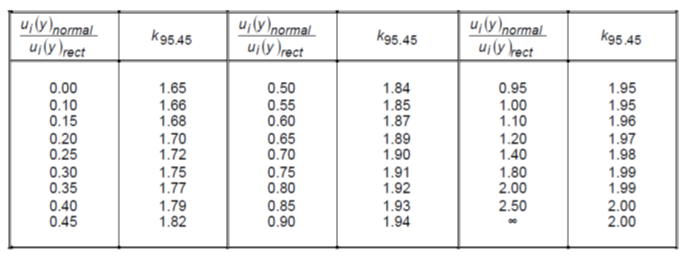

Siendo el ratio igual a $\large\frac{Vi_{uc}}{Ii_{uc}} =0.845 $ el coeficiente de expansion K' = 1.93. Por lo tanto el semirango de la Ri es: 

In [8]:
Err_Ri = Ri_uc * 1.93

print("Error absoluto de la Resistencia indicada Ri: %0.2f" %Err_Ri)

Error absoluto de la Resistencia indicada Ri: 0.19


## Error de Método - Corriente Bien medida

In [9]:
#ERROR DE MÉTODO - CORRIENTE BIEN MEDIDA
RA = 200e-3/10 #Estimada a partir de la mínima escala de tensíon y la escala de corriente empleada
Em = RA / (Ri_mean-RA)

Delta_Em = Em * (Ri_mean-RA) #En este caso el error absoluto es RA

print("Error absoluto de método: %0.3f" %Delta_Em)

Error absoluto de método: 0.020


## Comparación de incertidumbre de la Ri con el error de método

Siendo el error absoluto de la resistencia indicada 9.5 veces el error de metodo, no se puede despreciar este ultimo, y hay que corregir.

In [11]:
R_ok = Ri_mean/(1+Em)

# INCERTIDUMBRE COMINADA R_ok
dR_ok_dRi = 1/(1+Em)
R_ok_uc = np.sqrt((dR_ok_dRi * Ri_uc)**2)

Como la correción del error de método es simplemente multiplicar por una constante, la distribución de la incertidumbre combinada de los valores corregidos sigue siendo uniforme, por lo que no hace falta recalcular los grados de libertad, y el factor de expansion $K = K^{'}$

In [16]:
# INCERTIDUMBRE COMINADA EXPANDIDA R_ok
R_ok_uc_exp = R_ok_uc * 1.93

print("Incertidumbre combinada expandida de R_ok =  %0.3f" %R_ok_uc_exp)

Incertidumbre combinada expandida de R_ok =  0.192


## Conlcusión

In [15]:
print("Resistencia de canal RDSon = %0.1f +- %0.1f @ 99%% confianza (K = 3)" %(R_ok, R_ok_uc_exp))

Resistencia de canal RDSon = 4.0 +- 0.2 @ 99% confianza (K = 3)
